In [14]:
import random

class Deck:
    def __init__(self):
        self.RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'J', 'Q', 'K', 'A']
        self.SUITS = ['♠', '♦', '♣', '♥']
        self.cards = [(rank, suit) for rank in self.RANKS for suit in self.SUITS]
        
    def deal(self, n):
        """
        Deals n random hands from the deck with 2 cards each and returns the hands.
        
        Parameters:
        - n (int): The number of hands to deal.
        
        Returns:
        - hands (list): A list of hands, where each hand is a list of cards.
        """
        hands = []
        for _ in range(n):
            hand = random.sample(self.cards, 2)
            self.cards = [card for card in self.cards if card not in hand]
            hands.append(hand)
        return hands
    
    def board(self):
        """
        Returns a random board of 5 cards from the deck.
        
        Returns:
        - board_cards (list): A list of 5 randomly chosen cards.
        """
        board_cards = random.sample(self.cards, 5)
        self.cards = [card for card in self.cards if card not in board_cards]
        return board_cards
    
    def remaining(self):
        """
        Returns the remaining cards in the deck.
        
        Returns:
        - remaining_deck (list): The list of remaining cards in the deck.
        """
        return self.cards






In [17]:
# Testing
deck_instance = Deck()

# Dealing 4 random hands
hands = deck_instance.deal(2)
print(hands)

# Getting a board from the remaining deck
board_cards = deck_instance.board()
board_cards


[[('T', '♣'), ('3', '♣')], [('Q', '♠'), ('8', '♣')]]


[('Q', '♥'), ('T', '♦'), ('6', '♦'), ('K', '♥'), ('7', '♠')]

In [4]:
hands, remaining_deck = deal(deck, 4)
board_cards, updated_deck = board(remaining_deck)

In [19]:
def simulate_game(starting_hand, n_players):
    """
    Simulates a game with the given starting hand and n players. It returns the starting hands for all players 
    and the board state.
    
    Parameters:
    - starting_hand (list): The starting hand for the main player.
    - n_players (int): The number of players including the main player.
    
    Returns:
    - all_hands (list): A list of starting hands for all players.
    - board_cards (list): The board state.
    """
    # Create a deck instance
    deck_instance = Deck()
    
    # Remove the starting hand from the deck
    deck_instance.cards = [card for card in deck_instance.cards if card not in starting_hand]
    
    # Deal hands for the remaining players
    other_hands = deck_instance.deal(n_players - 1)
    
    # Get the board
    board_cards = deck_instance.board()
    
    # Combine the starting hand and other hands
    all_hands = [starting_hand] + other_hands
    
    return all_hands, board_cards

# Testing the function with a given starting hand and 4 players in total
starting_hand_test = [('A', '♠'), ('K', '♠')]
simulate_game(starting_hand_test, 4)


([[('A', '♠'), ('K', '♠')],
  [('9', '♣'), ('A', '♥')],
  [('7', '♠'), ('T', '♣')],
  [('7', '♦'), ('J', '♦')]],
 [('6', '♥'), ('8', '♦'), ('A', '♣'), ('Q', '♥'), ('5', '♥')])

In [20]:
from collections import Counter

def is_straight(card_values):
    """Check if the given card values form a straight."""
    unique_values = sorted(list(set(card_values)))
    if len(unique_values) < 5:
        return False
    for i in range(len(unique_values) - 4):
        if unique_values[i + 4] - unique_values[i] == 4:
            return True
    # Check for A-2-3-4-5 straight (A can be both high and low)
    if set(unique_values[:4]) == set([2, 3, 4, 5]) and 14 in unique_values:
        return True
    return False

def rank_hand(hand, board):
    """Rank the given hand based on the board cards."""
    all_cards = hand + board
    card_values = [card[0] for card in all_cards]
    card_values = [10 if card == 'T' else 11 if card == 'J' else 12 if card == 'Q' 
                   else 13 if card == 'K' else 14 if card == 'A' else int(card) for card in card_values]
    card_suits = [card[1] for card in all_cards]
    value_counts = Counter(card_values)
    most_common_values = value_counts.most_common()
    
    # Check for Royal Flush and Straight Flush
    for suit in set(card_suits):
        suit_values = sorted([card_values[i] for i, card in enumerate(all_cards) if card[1] == suit], reverse=True)
        if len(suit_values) >= 5 and is_straight(suit_values):
            if max(suit_values) == 14:
                return (9, "Royal Flush")
            return (8, max(suit_values), "Straight Flush")
    
    # Check for Four of a Kind
    if most_common_values[0][1] == 4:
        return (7, most_common_values[0][0], "Four of a Kind")
    
    # Check for Full House
    if most_common_values[0][1] == 3 and most_common_values[1][1] >= 2:
        return (6, most_common_values[0][0], most_common_values[1][0], "Full House")
    
    # Check for Flush
    for suit in set(card_suits):
        suit_values = sorted([card_values[i] for i, card in enumerate(all_cards) if card[1] == suit], reverse=True)
        if len(suit_values) >= 5:
            return (5, tuple(suit_values[:5]), "Flush")
    
    # Check for Straight
    if is_straight(card_values):
        return (4, max([v for v in card_values if is_straight([v - i for i in range(5)])]), "Straight")
    
    # Check for Three of a Kind
    if most_common_values[0][1] == 3:
        return (3, most_common_values[0][0], "Three of a Kind")
    
    # Check for Two Pair
    if most_common_values[0][1] == 2 and most_common_values[1][1] == 2:
        remaining_values = sorted([v for v in card_values if v != most_common_values[0][0] and v != most_common_values[1][0]], reverse=True)
        return (2, most_common_values[0][0], most_common_values[1][0], remaining_values[0], "Two Pair")
    
    # Check for One Pair
    if most_common_values[0][1] == 2:
        remaining_values = sorted([v for v in card_values if v != most_common_values[0][0]], reverse=True)
        return (1, most_common_values[0][0], tuple(remaining_values[:3]), "One Pair")
    
    # High Card
    return (0, tuple(sorted(card_values, reverse=True)[:5]), "High Card")

# Testing the rank_hand function
test_hand = [('A', '♠'), ('K', '♠')]
test_board = [('Q', '♠'), ('J', '♠'), ('T', '♠'), ('3', '♣'), ('4', '♦')]
rank_hand(test_hand, test_board)


(9, 'Royal Flush')

In [23]:
def determine_outcome(all_hands, board):
    """Determine if the first hand wins, loses, or ties based on the board."""
    
    # Rank each hand
    hand_ranks = [rank_hand(hand, board) for hand in all_hands]
    
    # Compare ranks to determine the outcome for the first hand
    first_hand_rank = hand_ranks[0]
    
    if all(first_hand_rank > rank for rank in hand_ranks[1:]):
        return "Wins"
    elif any(first_hand_rank < rank for rank in hand_ranks[1:]):
        return "Loses"
    else:
        return "Ties"

# Testing the function
all_hands_test, board_test = simulate_game([('A', '♠'), ('K', '♠')], 4)
determine_outcome(all_hands_test, board_test)


'Wins'

In [67]:
def simulate_outcomes(starting_hand, n_players, n_simulations):
    """Simulate n games and return the win, loss, and tie percentages for the starting hand."""
    
    outcomes = {"Wins": 0, "Loses": 0, "Ties": 0}
    
    for _ in range(n_simulations):
        all_hands, board = simulate_game(starting_hand, n_players)
        outcome = determine_outcome(all_hands, board)
        outcomes[outcome] += 1
        
    # Calculate percentages
    for key in outcomes:
        outcomes[key] = (outcomes[key] / n_simulations) * 100
        
    return outcomes

# Testing the function with 1000 simulations
simulate_outcomes([('7', '♠'), ('7', '♣')], 5, 10000)


{'Wins': 26.619999999999997, 'Loses': 72.64, 'Ties': 0.74}

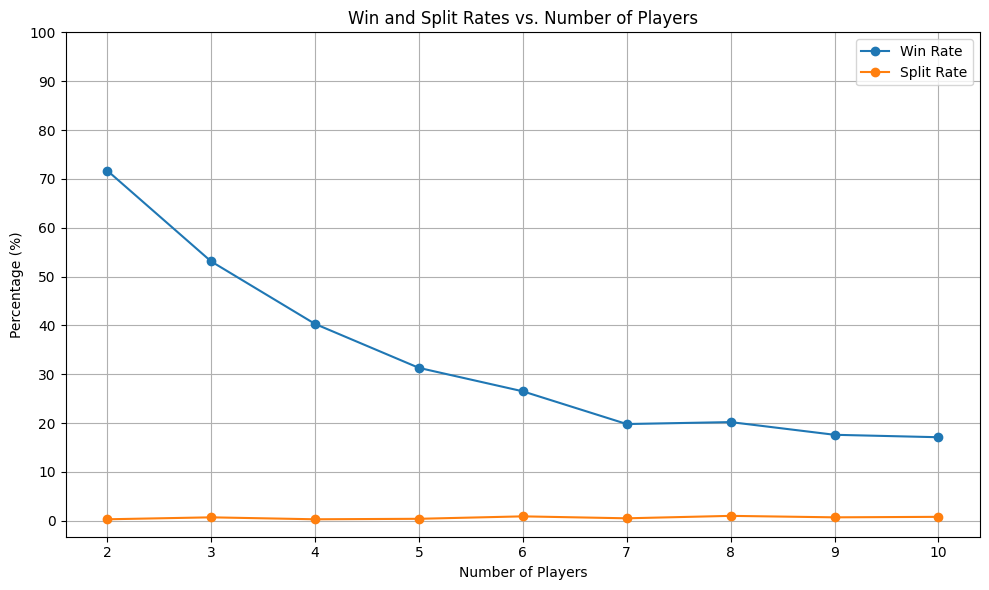

In [75]:
import matplotlib.pyplot as plt

# Maximum number of players to simulate
max_players = 10

win_rates = []
split_rates = []
player_counts = list(range(2, max_players + 1))

for n in player_counts:
    outcomes = simulate_outcomes([('9', '♠'), ('9', '♣')], n, 1000)
    win_rates.append(outcomes["Wins"])
    split_rates.append(outcomes["Ties"])

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(player_counts, win_rates, '-o', label='Win Rate')
plt.plot(player_counts, split_rates, '-o', label='Split Rate')
plt.xlabel('Number of Players')
plt.ylabel('Percentage (%)')
plt.title('Win and Split Rates vs. Number of Players')
plt.legend()
plt.grid(True)
plt.xticks(player_counts)
plt.yticks(range(0, 101, 10))
plt.tight_layout()
plt.show()


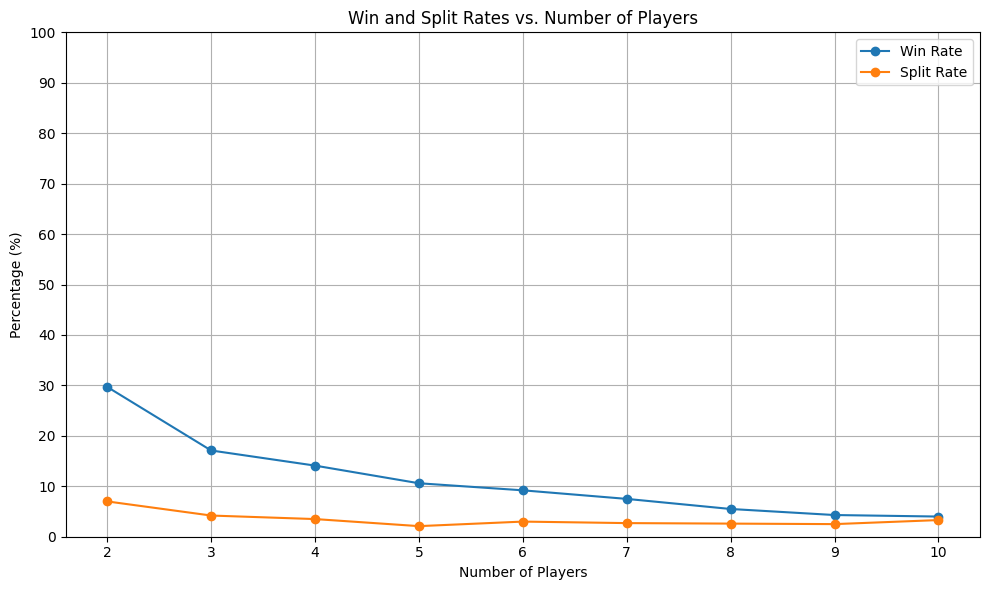

In [70]:
import matplotlib.pyplot as plt

# Maximum number of players to simulate
max_players = 10

win_rates = []
split_rates = []
player_counts = list(range(2, max_players + 1))

for n in player_counts:
    outcomes = simulate_outcomes([('7', '♠'), ('2', '♣')], n, 1000)
    win_rates.append(outcomes["Wins"])
    split_rates.append(outcomes["Ties"])

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(player_counts, win_rates, '-o', label='Win Rate')
plt.plot(player_counts, split_rates, '-o', label='Split Rate')
plt.xlabel('Number of Players')
plt.ylabel('Percentage (%)')
plt.title('Win and Split Rates vs. Number of Players')
plt.legend()
plt.grid(True)
plt.xticks(player_counts)
plt.yticks(range(0, 101, 10))
plt.tight_layout()
plt.show()


In [77]:
import ipywidgets as widgets
from IPython.display import display

# Define the plotting function
def plot_rates_for_hand(rank1, suit1, rank2, suit2):
    hand = [(rank1, suit1), (rank2, suit2)]
    
    win_rates = []
    split_rates = []

    for n in player_counts:
        outcomes = simulate_outcomes(hand, n, 1000)
        win_rates.append(outcomes["Wins"])
        split_rates.append(outcomes["Ties"])

    # Plotting the results
    plt.figure(figsize=(10,6))
    plt.plot(player_counts, win_rates, '-o', label='Win Rate')
    plt.plot(player_counts, split_rates, '-o', label='Split Rate')
    plt.xlabel('Number of Players')
    plt.ylabel('Percentage (%)')
    plt.title(f'Win and Split Rates for {hand[0]} and {hand[1]} vs. Number of Players')
    plt.legend()
    plt.grid(True)
    plt.xticks(player_counts)
    plt.yticks(range(0, 101, 10))
    plt.tight_layout()
    plt.show()

# Create interactive widgets
rank_slider1 = widgets.Dropdown(options=['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'J', 'Q', 'K', 'A'], description='Rank 1:')
suit_slider1 = widgets.Dropdown(options=['♠', '♦', '♣', '♥'], description='Suit 1:')
rank_slider2 = widgets.Dropdown(options=['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'J', 'Q', 'K', 'A'], description='Rank 2:')
suit_slider2 = widgets.Dropdown(options=['♠', '♦', '♣', '♥'], description='Suit 2:')

interactive_plot = widgets.interactive(plot_rates_for_hand, rank1=rank_slider1, suit1=suit_slider1, rank2=rank_slider2, suit2=suit_slider2)
output = interactive_plot.children[-1]
output.layout.height = '450px'
display(interactive_plot)


In [1]:
from collections import Counter

def hand_strength(hand):
    """
    Evaluates the strength of a hand.
    Returns a tuple (ranking, high_cards) where:
    - ranking is an integer from 1 to 10 (Royal Flush to High Card).
    - high_cards is a list of cards used to break ties.
    """
    # Pre-process the cards
    values = [card[0] for card in hand]
    suits = [card[1] for card in hand]
    value_counts = Counter(values)
    suit_counts = Counter(suits)
    sorted_values = sorted(value_counts, key=lambda x: (value_counts[x], RANKS.index(x)), reverse=True)
    
    # Check for flushes and straights
    flush = any(count >= 5 for count in suit_counts.values())
    consecutive = 0
    prev_rank = None
    for rank in RANKS[::-1]:  # Start from Ace and go down
        if rank in values:
            if prev_rank and RANKS.index(rank) == RANKS.index(prev_rank) - 1:
                consecutive += 1
            else:
                consecutive = 1
            prev_rank = rank
            if consecutive == 5:
                break
    
    straight = consecutive >= 5
    if straight and 'A' in values and '2' in values and '3' in values and '4' in values and '5' in values:
        straight = True
        sorted_values = ['5', '4', '3', '2', 'A']
    
    # Royal Flush
    if flush and straight and sorted_values == ['A', 'K', 'Q', 'J', 'T']:
        return (1, sorted_values)
    # Straight Flush
    if flush and straight:
        return (2, sorted_values[:5])
    # Four of a Kind
    if 4 in value_counts.values():
        quad = [val for val, count in value_counts.items() if count == 4][0]
        return (3, [quad] + [v for v in sorted_values if v != quad])
    # Full House
    if 3 in value_counts.values() and 2 in value_counts.values():
        trips = [val for val, count in value_counts.items() if count == 3][0]
        pair = [val for val, count in value_counts.items() if count == 2][0]
        return (4, [trips, pair])
    # Flush
    if flush:
        flush_suit = [suit for suit, count in suit_counts.items() if count >= 5][0]
        flush_values = sorted([card[0] for card in hand if card[1] == flush_suit], key=lambda x: RANKS.index(x), reverse=True)
        return (5, flush_values[:5])
    # Straight
    if straight:
        return (6, sorted_values[:5])
    # Three of a Kind
    if 3 in value_counts.values():
        trips = [val for val, count in value_counts.items() if count == 3][0]
        return (7, [trips] + [v for v in sorted_values if v != trips][:2])
    # Two Pair
    if list(value_counts.values()).count(2) >= 2:
        pairs = [val for val, count in value_counts.items() if count == 2]
        return (8, pairs + [v for v in sorted_values if v not in pairs][:1])
    # One Pair
    if 2 in value_counts.values():
        pair = [val for val, count in value_counts.items() if count == 2][0]
        return (9, [pair] + [v for v in sorted_values if v != pair][:3])
    # High Card
    return (10, sorted_values[:5])


def winning_hands(hands, board_cards):
    """
    Determine the winning hand(s) from a list of hands given the board cards.
    """
    best_rank = 11  # Start with a value outside of the possible ranks
    winners = []
    best_high_cards = None
    
    for hand in hands:
        combined_cards = hand + board_cards
        rank, high_cards = hand_strength(combined_cards)
        if rank < best_rank:
            best_rank = rank
            winners = [hand]
            best_high_cards = high_cards
        elif rank == best_rank:
            # Tiebreaker based on high cards
            for i in range(5):
                if RANKS.index(high_cards[i]) > RANKS.index(best_high_cards[i]):
                    winners = [hand]
                    best_high_cards = high_cards
                    break
                elif RANKS.index(high_cards[i]) < RANKS.index(best_high_cards[i]):
                    break
            else:
                winners.append(hand)
    
    return winners

# Testing with a sample scenario
sample_hands = [[('K', '♠')], [('Q', '♠'), ('J', '♠')]]
sample_board = [('T', '♠'), ('9', '♠'), ('8', '♠'), ('7', '♠'), ('6', '♠')]

winning_hands(sample_hands, sample_board)


NameError: name 'RANKS' is not defined

In [61]:
def hand_description(rank, high_cards):
    """
    Returns a description of the hand based on its rank and high cards.
    """
    descriptions = {
        1: "Royal Flush",
        2: "Straight Flush ending in {}".format(high_cards[0]),
        3: "Four of a Kind (Quads) of {}".format(high_cards[0]),
        4: "Full House with {} over {}".format(high_cards[0], high_cards[1]),
        5: "Flush with high card {}".format(high_cards[0]),
        6: "Straight ending in {}".format(high_cards[0]),
        7: "Three of a Kind (Trips) of {}".format(high_cards[0]),
        8: "Two Pair - {} and {}".format(high_cards[0], high_cards[1]),
        9: "One Pair of {}".format(high_cards[0]),
        10: "High Card of {}".format(high_cards[0])
    }
    return descriptions[rank]

def winning_hands(hands, board_cards):
    """
    Determine the winning hand(s) from a list of hands given the board cards.
    Also returns the reason for the win.
    """
    best_rank = 11  # Start with a value outside of the possible ranks
    winners = []
    best_high_cards = None
    
    for hand in hands:
        combined_cards = hand + board_cards
        rank, high_cards = hand_strength(combined_cards)
        if rank < best_rank:
            best_rank = rank
            winners = [hand]
            best_high_cards = high_cards
        elif rank == best_rank:
            # Tiebreaker based on high cards
            for i in range(5):
                if RANKS.index(high_cards[i]) > RANKS.index(best_high_cards[i]):
                    winners = [hand]
                    best_high_cards = high_cards
                    break
                elif RANKS.index(high_cards[i]) < RANKS.index(best_high_cards[i]):
                    break
            else:
                winners.append(hand)
    
    return winners, hand_description(best_rank, best_high_cards)

# Testing with the previous sample scenario
winning_hands([[('A', '♥'), ('A', '♣')],
 [('A', '♠'), ('A', '♦')],
 [('4', '♥'), ('K', '♦')]], #board
 [('6', '♦'), ('2', '♥'), ('J', '♦'), ('3', '♥'), ('9', '♥')])


IndexError: list index out of range

In [55]:
board_cards

[('6', '♦'), ('A', '♥'), ('J', '♦'), ('2', '♥'), ('9', '♥')]

In [56]:
hands

[[('Q', '♥'), ('3', '♣')],
 [('7', '♥'), ('A', '♦')],
 [('4', '♥'), ('K', '♦')],
 [('9', '♣'), ('T', '♥')]]